# Identificação

- Discente: Helder Mateus dos Reis Matos
- Matrícula: 202520080003
- Disciplina: Fundamentos de Inteligência Computacional e Ciência de Dados
- Docente: Claudomiro de Souza de Sales Junior
- Tarefa: Atividade 04 - Programas em Python for p-value, confidence intervals e correlation

- Link para o Colab (modo leitura): https://colab.research.google.com/drive/166wm78JXHdWpk3_bmnp90bNX9ndx_z2n?usp=sharing

# 0. Configurações

In [122]:
import itertools
import time
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from scipy.stats import norm, linregress, t, ttest_ind

sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

# 1. Correlação

_Faça plotes similares as duas figuras mostradas nos dois próximos slides._

_Cada uma deve ter 9 pontos. A segunda deve ter seus dados gerados aleatoriamente com uma distribuição uniforme no mesmo intervalo da primeira._

_Use a função linregress para achar um reta que represente os dados e também para calcular o p-value. Interprete os resultados. Pesquise sobre a função linregress._

_Calcule a covariância e interprete os resultados._

<div style="display: flex; justify-content: center; gap: 10px;">
    <img src="https://github.com/hellsdeur/ficcd-ppgcc-2025/blob/main/atividade04/imagens/1a.png?raw=true" alt="Figura 1A" width="400px">
    <img src="https://github.com/hellsdeur/ficcd-ppgcc-2025/blob/main/atividade04/imagens/1b.png?raw=true" alt="Figura 1B" width="400px">
</div>

Iniciamos colhendo os dados do experimento. Considerando um alcance entre 0 e 10, com uma quantidade de 9 elementos, a amostra 1 é tomada a partir de uma distribuição uniforme, onde os valores do eixo x estão perfeitamente alinhados com o do eixo y. Já para a amostra 2, é colhido um vetor para cada eixo. O resultado de `linregress()` é a regressão linear por quadrados mínimos entre os dois eixos, indicando os valores de:

- `slope`: a inclinação da reta de regressão;
- `intercept`: a interseção no eixo x da reta;
- `rvalue`: o coeficiente de correlação de Pearson;
- `pvalue`: o p-value de um teste de hipótese cujo $H_{0}$ é um $slope = 0$ (Wald test com t-distribution). Em outras palavras, este teste tenta provar que não existe relação linear entre as variáveis e que uma reta horizontal represente boa parte da distribuição dos dados.
- `stderr`: o erro padrão para um intervalo de confiança de 95%.

In [2]:
rsup = 10
rinf = 0
sample_size = 9

sample1 = np.random.uniform(rsup, rinf, sample_size)

sample2x = np.random.uniform(rsup, rinf, sample_size)
sample2y = np.random.uniform(rsup, rinf, sample_size)

slope1, intercept1, r_value1, p_value1, std_err1 = linregress(sample1, sample1)
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(sample2x, sample2y)

print("Sample 1: ", sample1)
print("Sample 2x: ", sample2x)
print("Sample 2y: ", sample2y)

print(f"Regression 1: slope: {slope1}, intercept: {intercept1}, r_value: {r_value1}, p_value: {p_value1}, std_err: {std_err1}")
print(f"Regression 2: slope: {slope2}, intercept: {intercept2}, r_value: {r_value2}, p_value: {p_value2}, std_err: {std_err2}")

Sample 1:  [5.13037324 6.86292966 5.8780707  6.20378673 5.67122066 5.75043347
 7.75195793 7.60173339 8.6940046 ]
Sample 2x:  [0.29415279 1.66604529 9.59624299 1.26073358 9.42405389 7.43525816
 1.35687106 6.52201293 9.70991662]
Sample 2y:  [3.91194182 3.23660016 5.86421701 7.93970322 1.75688553 6.36362086
 1.79391234 1.77593482 3.00872249]
Regression 1: slope: 1.0, intercept: 0.0, r_value: 1.0, p_value: 3.292585384803146e-70, std_err: 0.0
Regression 2: slope: -0.05569760561556262, intercept: 4.253789064553807, r_value: -0.09960134908939819, p_value: 0.7987637487211015, std_err: 0.21030874634686125


A partir dos valores obtidos para as duas configurações, foi montada a Figura abaixo, com a Regressão 1 a esquerda e a Regressão 2 à direita.

A reta 1 passa sobre os 9 pontos que representam a relação linear obtida na amostra, com um p-value da ordem de $10^{-70}$, indicando que o resultado é extremamente significativo.

Por outro lado, a reta 2 obtida para os pontos altamente dispersos da outra distribuição possuem um p-value de 0.79, mostrando que não há evidências suficientes para rejeitar a hipótese nula de que não existe correlação linear entre as variáveis.

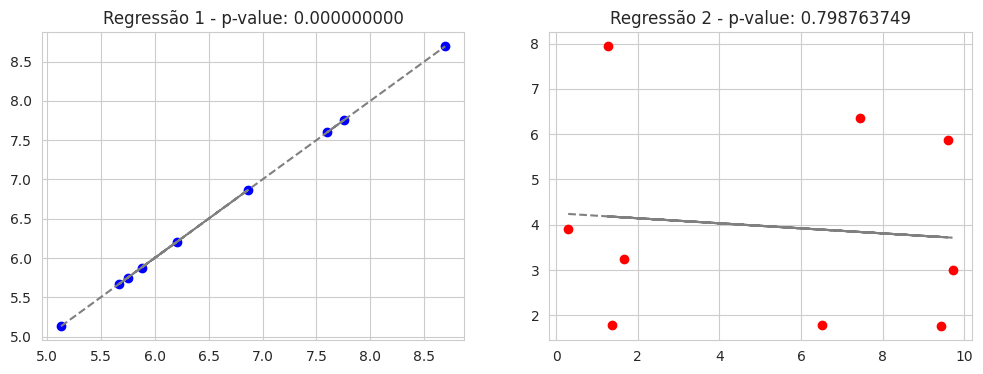

In [3]:
fig1, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].scatter(sample1, sample1, color="blue")
axs[0].plot(sample1, slope1 * sample1 + intercept1, color="gray", linestyle="--")
axs[0].set_title(f"Regressão 1 - p-value: {p_value1:.9f}")
axs[0].grid(True)

axs[1].scatter(sample2x, sample2y, color="red")
axs[1].plot(sample2x, slope2 * sample2x + intercept2, color="gray", linestyle="--")
axs[1].set_title(f"Regressão 2 - p-value: {p_value2:.9f}")
axs[1].grid(True)

Podemos usar essa interpretação para reforçar a análise da covariância dos dados. A covariância $cov_{x,y}$ entre duas variáveis $x$ e $y$ pode ser calculada por:

$$cov_{x,y} = \frac{\sum(x_{i} - \overline{x})(y_{i} - \overline{x})}{n-1}$$

Onde:

- $x_{i}$ é o i-ésimo valor de $x$;
- $y_{i}$ é o i-ésimo valor de $y$;
- $\overline{x}$ é a média de $x$;
- $\overline{y}$ é a média de $y$;
- $n$ é a quantidade de valores.

A função `covariance()` realiza o cálculo da covariância entre duas variáveis.

In [4]:
def covariance(x, y):
    n = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    cov = np.sum((x - mean_x) * (y - mean_y)) / n
    return cov

Para a amostra 1, a covariância é positiva, reforçando a dependência linear entre as variáveis.

In [5]:
cov1 = covariance(sample1, sample1)
print(f"Covariance 1: {cov1}")

Covariance 1: 1.244945311845238


Para a amostra 2, a covariância é negativa, indicando que os valores de $x$ aumentam, os valores de $y$ tendem a diminuir. Além disso, a covariância aqui é mais próxima de 0, mostrando que a relação linear entre as variáveis é menor, o que é reforçado pelo alto valor do p-value calculado.

In [6]:
cov2 = covariance(sample2x, sample2y)
print(f"Covariance 2: {cov2}")

Covariance 2: -0.8111589302500298


# 2. Estimando um Intervalo de Confiança para a Média

_Obtenha um conjunto de dados amostrais (por exemplo, pesos de indivíduos, notas de testes, etc.)._

_Calcule o intervalo de confiança de 95% para a média da população seguindo os passos:_

- _Calcular a média e o desvio padrão da amostra._
- _Usar a fórmula para intervalo de confiança ou a biblioteca `scipy.stats`._

_Desafio: Repetir o processo para diferentes níveis de confiança (por exemplo, 90%, 99%) e comparar os resultados._

_Visualizar os intervalos de confiança em um gráfico usando matplotlib para mostrar a variabilidade._

## 2.1. Dataset de performance de alunos

O [dataset escolhido](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams) consiste das notas de 1000 alunos em diversos componentes, como matemática, leitura e escrita. Existem variáveis socioeconômicas que descrevem o contexto familiar do aluno e seu nível de preparação para as provas.

In [10]:
!curl -L -o ./students-performance-in-exams.zip https://www.kaggle.com/api/v1/datasets/download/spscientist/students-performance-in-exams

!unzip -o students-performance-in-exams.zip && rm students-performance-in-exams.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  8907  100  8907    0     0   5710      0  0:00:01  0:00:01 --:--:-- 10969
Archive:  students-performance-in-exams.zip
  inflating: StudentsPerformance.csv  


O objetivo do presente estudo é medir o intervalo de confiança para as notas de matemática. Dessa forma, a coluna `math score` será utilizada daqui em diante.

In [11]:
df_students = pd.read_csv("StudentsPerformance.csv")
df_students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## 2.2. Construindo uma função para intervalos de confiança

A seguir serão descritos os componentes básicos para criar uma função que compute intervalos de confiança.

As primeiras medidas importantes para a análise são a média e desvio padrão da população.

In [54]:
sample_mean = df_students["math score"].mean()
sample_std = df_students["math score"].std()

print(f"Sample Mean: {sample_mean}\nSample Std: {sample_std}")

Sample Mean: 66.089
Sample Std: 15.16308009600945


Em seguida, deve ser calculado o valor de `t_critical`, implementado aqui na biblioteca do SciPy, que depende de dois parâmetros:

- `confidence level`: o nível de confiança exigido no intervalo de confiança. O SciPy requer um valor de probabilidade acumulada, não diretamente como nível de confiança. Assim, em vez de usar 0.95, usamos o valor crítico obtido com metade da área de significância em cada cauda da distribuição t, ou seja 0.975.
- `degrees_freedom`: o grau de liberdade do intervalo de confiança. Para um intervalo de confiança envolvendo duas amostras, esse grau é calculado como $n−1$.

Conforme adiantado, será usada a função `ppf()`, a função de ponto percentual em um nível de confiança `q`, que retorna o quartil correspondente a probabilidade `q` da cauda inferior.

In [55]:
confidence_level = 0.95
true_confidence_level = 1 - (1 - confidence_level) / 2
degrees_freedom = len(df_students) - 1

t_critical = t.ppf(true_confidence_level, degrees_freedom)
print(f"t Critical Value: {t_critical}")

t Critical Value: 1.9623414611334487


Assim, pode ser obtido um alcance de confiança, a metade do intervalo de confiança, através da fórmula:

$$\bar{x} \pm t \cdot \frac{s}{\sqrt{n}}$$

Onde:

- $\bar{x}$: é a média amostral.
- $t$: é o valor crítico da distribuição t-student.
- $s$: é o desvio padrão amostral.
- $n$: é o tamanho da amostra.

In [56]:
confidence_range = t_critical * (sample_std / math.sqrt(len(df_students)))
print(f"Confidence Range: {confidence_range}")

Confidence Range: 0.9409401687169479


Finalmente o intervalo de confiança é calculado para mais ou menos o valor da média amostral.

In [57]:
confidence_lower = sample_mean - confidence_range
confidence_upper = sample_mean + confidence_range

print(f"Confidence Interval: ({confidence_lower}, {confidence_upper})")

Confidence Interval: (65.14805983128305, 67.02994016871695)


Com estes componentes em mãos, podemos construir a função `margin()`, que retorna a margem de erro do intervalo de confiança.

In [58]:
def margin(s, confidence_level: float):
    n = len(s)
    degrees_freedom = n - 1
    true_confidence_level = 1 - (1 - confidence_level) / 2
    std = s.std()
    t_critical = t.ppf(true_confidence_level, degrees_freedom)
    margin = t_critical * (std / math.sqrt(n))
    return margin

## 2.3. Plotando intervalos de confiança nos histogramas

Vou complementar os gráficos de histograma e curva fitada das atividades anteriores, adicionando a barra de erro do intervalo de confiança. Para efeitos de visualização de valores pequenos, o gráfico agora conta com recurso de zoom no intervalo.

<Axes: title={'center': 'Distribuição de notas de matemática (Conf. 95%)'}>

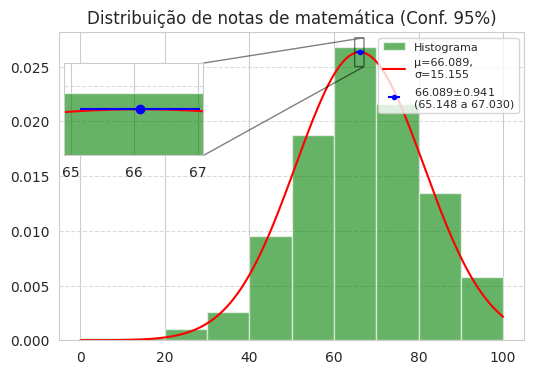

In [182]:
def histogram_with_intervals(s, confidence_level: float, title: str, ax: plt.Axes = None):

    sample_mean = np.mean(s)

    margin_error = margin(s, confidence_level)

    margin_lower = sample_mean - margin_error
    margin_upper = sample_mean + margin_error

    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))

    ax.hist(s, bins=10, density=True, alpha=0.6, color='g', label="Histograma")

    mu, sigma = norm.fit(s)
    x = np.linspace(min(s), max(s), 1000)
    pdf = norm.pdf(x, mu, sigma)

    ax.plot(x, pdf, 'r-', label=f"μ={mu:.3f},\nσ={sigma:.3f}")

    ax.errorbar(
        sample_mean, pdf.max(),
        xerr=[[sample_mean - margin_lower], [margin_upper - sample_mean]],
        fmt='o', color='blue', label=f'{sample_mean:.3f}'+r'$\pm$'+f'{margin_error:.3f}'+f'\n({margin_lower:.3f} a {margin_upper:.3f})',
        markersize=3
    )
    
    inset = ax.inset_axes([0.01, 0.6, 0.3, 0.3])
    inset.hist(s, bins=10, density=True, alpha=0.6, color='g')
    inset.plot(x, pdf, 'r-')
    inset.errorbar(
        sample_mean, pdf.max(),
        xerr=[[sample_mean - margin_lower], [margin_upper - sample_mean]],
        fmt='o', color='blue'
    )

    inset.set_xlim(sample_mean - 1.2, sample_mean + 1)
    inset.set_ylim((pdf.max()-pdf.max()*0.05, pdf.max()+pdf.max()*0.05))
    inset.grid(axis='y', linestyle='--', alpha=0.7)
    inset.set_yticklabels([])

    ax.indicate_inset_zoom(inset, edgecolor="black")

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_title(title)

    ax.legend(loc="upper right", fontsize=8)

    return ax

confidence_level = 0.95
histogram_with_intervals(df_students["math score"], confidence_level, f"Distribuição de notas de matemática (Conf. {int(confidence_level*100)}%)")

Vamos variar os níveis de confiança e observar os intervalos gerados. A função `generate_confidence_levels()` retorna `n` valores de nível de confiança tomados a partir de 0.99 em ordem decrescente, com até 2 casas decimais.

In [163]:
def generate_confidence_levels(n: int):
    value = 99
    i = n

    while i > 1:
        value = value - 1
        i = i - 1

    return np.linspace(value, 99, n) / 100

levels = generate_confidence_levels(16)
levels

array([0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94,
       0.95, 0.96, 0.97, 0.98, 0.99])

Com isso, a função `histogram_with_intervals_grid()` gera uma grid de histograma para os diferentes intervalos de confiança das notas de matemática. É possível observar que a margem de erro dos intervalos vai aumentando de acordo com o aumento do nível de confiança, o que significa que aumenta também a certeza de que a média da população estará contida no intervalo especificado.

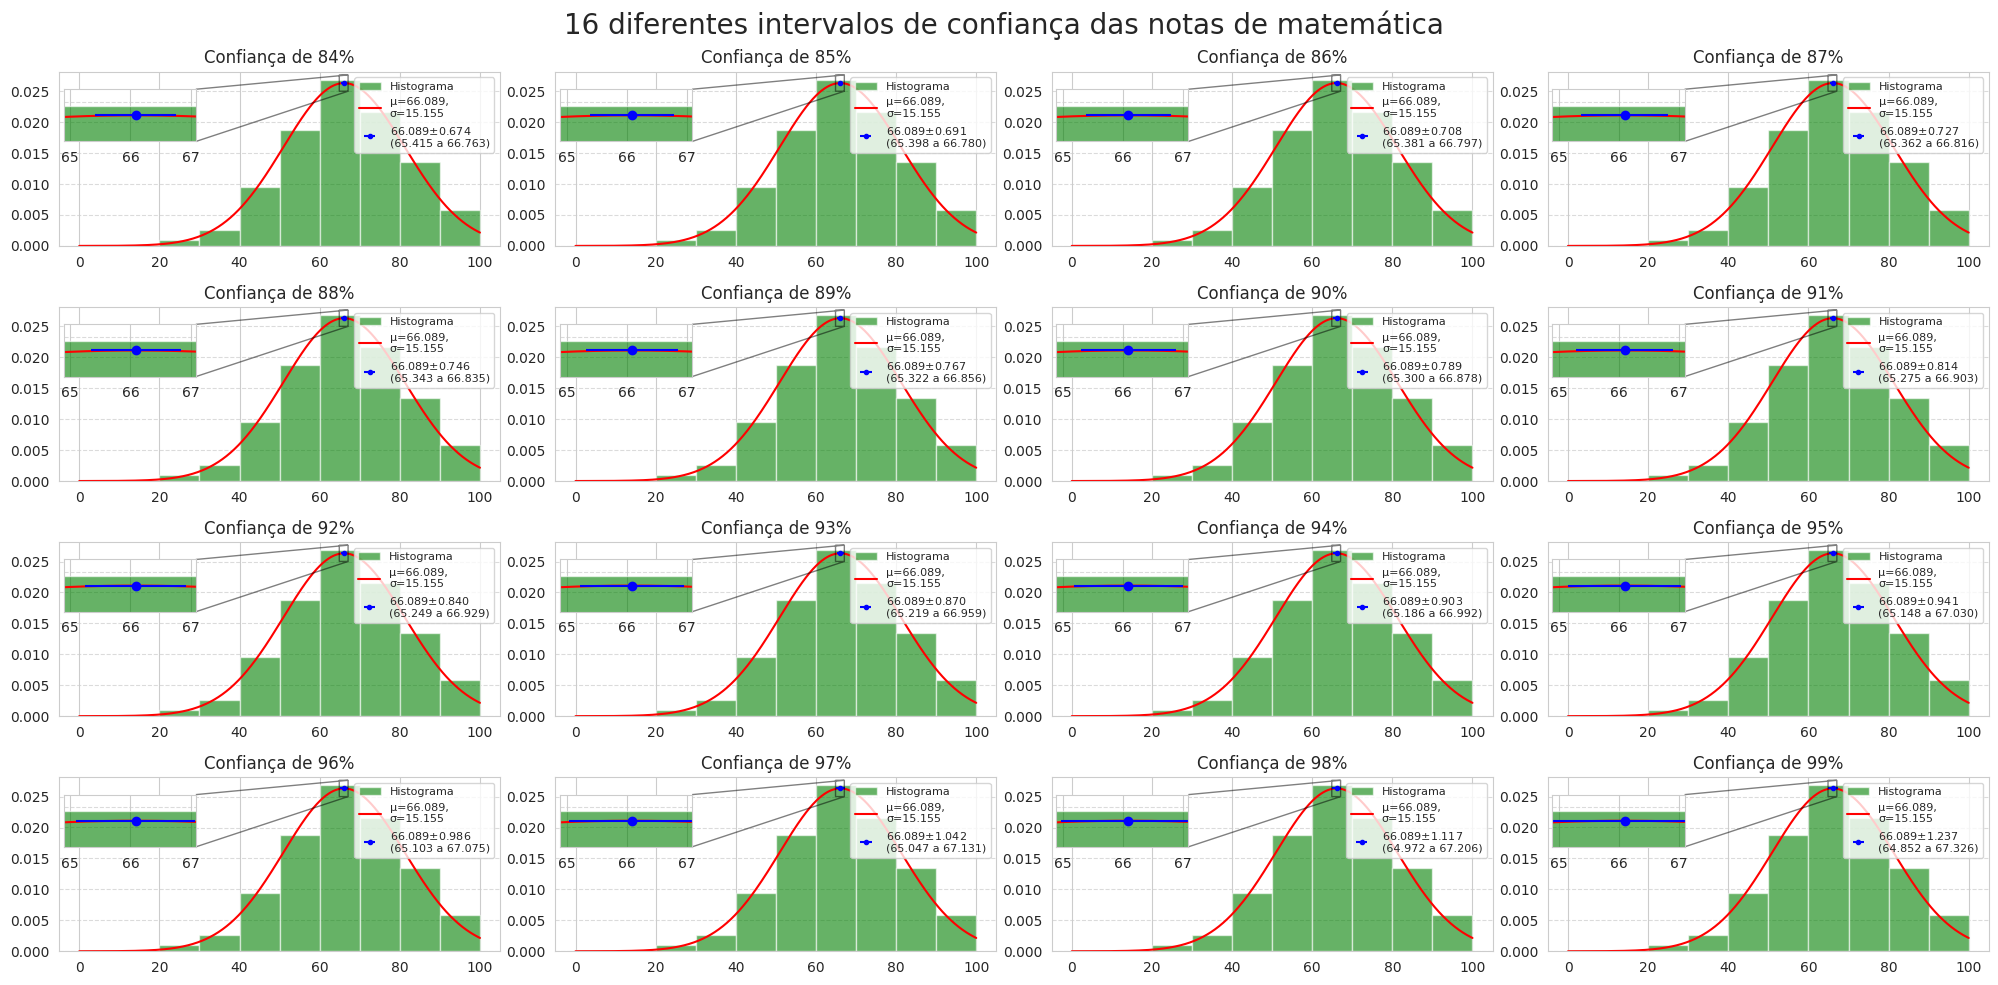

In [183]:
def histogram_with_intervals_grid(s, confidence_levels: list, title):

    dim = math.ceil(math.sqrt(len(confidence_levels)))

    fig, axs = plt.subplots(dim, dim, figsize=(20, 10))

    for i, confidence_level in enumerate(confidence_levels):
        row = i // dim
        col = i % dim

        ax = axs[row, col]

        histogram_with_intervals(s, confidence_level, f"Confiança de {int(confidence_level*100)}%", ax=ax)

    fig.suptitle(title, fontsize=20)
    fig.tight_layout(rect=[0, 0, 1, 0.96])
    fig.tight_layout()
    return fig, axs

histogram_with_intervals_grid(df_students["math score"], levels, f"{len(levels)} diferentes intervalos de confiança das notas de matemática");

## 2.4. Comparação dos intervalos de confiança

Uma última visualização menos poluída dos intervalos é dada pela Figura abaixo, organizando as escalas de aumento do intervalo de confiança.

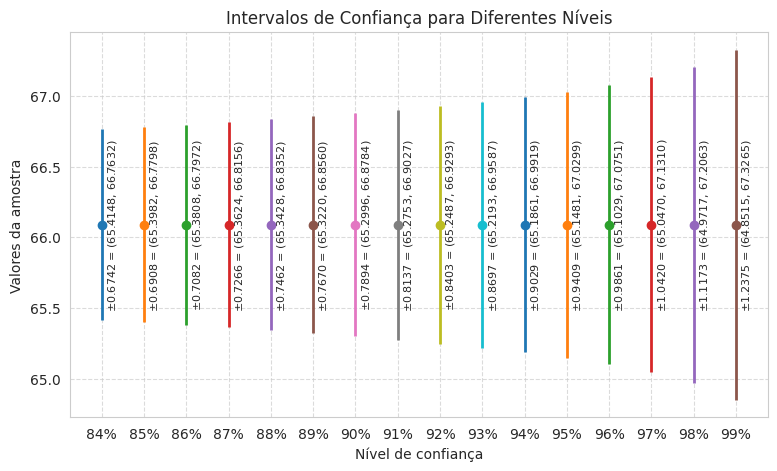

In [202]:
fig_ci, axs_ci = plt.subplots(figsize=(9, 5))

for i, conf in enumerate(levels):
    mean = df_students["math score"].mean()
    margin_error = margin(df_students["math score"], conf)
    lower, upper = mean - margin_error, mean + margin_error
    plt.errorbar(i, mean, yerr=[[mean - lower], [upper - mean]], fmt='o', linewidth=2)

    text = r"$\pm$" + f"{margin_error:.4f} = ({lower:.4f}, {upper:.4f})"
    plt.text(i + 0.1, mean, text, fontsize=8, va='center', rotation=90)


plt.title("Intervalos de Confiança para Diferentes Níveis")
plt.xlabel("Nível de confiança")
plt.ylabel("Valores da amostra")
plt.xticks(range(len(levels)), [f'{int(c*100)}%' for c in levels])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 3. P-value em um Teste de Hipótese

_Forneça dois conjuntos de dados: um para um grupo de controle e outro para um grupo de teste._

- _Formule a hipótese nula._
- _Realizar um teste t de duas amostras usando `scipy.stats.ttest_ind`._

_Interpretar o p-value resultante e decidir se rejeitam a hipótese nula em um  nível de significância dado (por exemplo, 0,05)._

## 3.1. Dataset do Stack Overflow Annual Developer Survey 2023 e 2024

O estudo a seguir vai focar na confiança que desenvolvedores tem em ferramentas de IA, tanto para busca quanto para desenvolvimento. Segue uma headline que indica que existe um alto grau de confiança entre desenvolvedores em relação à IA.

<p align="center">
  <a href="https://parametric-architecture.com/over-75-of-developers-trust-ai/" target="_blank">
    <img src="imagens/devs.png" alt="Imagem da Atividade 02" width="600">
  </a>
</p>

Para apoiar o estudo será utilizado o dataset do Stack Overflow Annual Developer Survey (aqui chamado de SOADS) para os anos de 2023 e 2024. O SOADS é uma das maiores pesquisas anuais sobre desenvolvedores, coletando dados sobre carreira, tecnologias, ambiente de trabalho e uso de IA. Os dados são anônimos e disponibilizados sob a Open Database License.

Vou utilizar o dataset de 2023 como grupo de controle, enquanto que o de 2024 como grupo de teste, para as hipóteses formuladas a seguir.

In [6]:
!curl -L -o ./soads2023.zip https://cdn.stackoverflow.co/files/jo7n4k8s/production/49915bfd46d0902c3564fd9a06b509d08a20488c.zip/stack-overflow-developer-survey-2023.zip
!curl -L -o ./soads2024.zip https://cdn.sanity.io/files/jo7n4k8s/production/262f04c41d99fea692e0125c342e446782233fe4.zip/stack-overflow-developer-survey-2024.zip

!unzip -o soads2023.zip -d soads2023/ && rm soads2023.zip
!unzip -o soads2024.zip -d soads2024/ && rm soads2024.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.6M  100 19.6M    0     0  5799k      0  0:00:03  0:00:03 --:--:-- 5800k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16.8M  100 16.8M    0     0  7693k      0  0:00:02  0:00:02 --:--:-- 7690k
Archive:  soads2023.zip
  inflating: soads2023/README_2023.txt  
  inflating: soads2023/so_survey_2023.pdf  
  inflating: soads2023/survey_results_public.csv  
  inflating: soads2023/survey_results_schema.csv  
Archive:  soads2024.zip
  inflating: soads2024/2024 Developer Survey.pdf  
  inflating: soads2024/survey_results_public.csv  
  inflating: soads2024/survey_results_schema.csv  


### 3.1.2. Grupo de controle

O DataFrame `df_2023` contém todas as informações do grupo de controle, incluindo a percepção dos desenvolvedores em relação à IA, nas colunas cujo nome se iniciam com "AI".

In [24]:
df_2023 = pd.read_csv("soads2023/survey_results_public.csv")
df_2023.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

Por se tratarem em grande parte de dados categóricos, é realizada abaixo uma avaliação das respostas para obter uma nota quantitativa de percepção de uso de IA em ambientes dev. O dicionário `trust2023` possui valores entre 0 a 1 para as diversas respostas possíveis do questionário, com valores próximos a 1 para percepções positivas e próximos a 0 para percepções negativas.

In [48]:
trust2023 = {
    "AISelect": {
        "Yes": 1,
        "No, but I plan to soon": 0.5,
        "No, and I don't plan to": 0
    },
    "AISent": {
        "Very favorable": 1,
        "Favorable": 0.75,
        "Indifferent": 0.5,
        "Unfavorable": 0.25,
        "Very unfavorable": 0,
        "Unsure": 0
    },
    "AIBen": {
        "High trust": 1,
        "Somewhat trust": 0.5,
        "Neither trust nor distrust": 0.25,
        "Somewhat distrust": 0,
    },
    "AIAcc": {
        "Increase productivity": 0.1666,
        "Grater efficiency": 0.1666,
        "Improve collaboration": 0.1666,
        "Speed up learning": 0.1666,
        "Improve accuracy in coding": 0.1666,
        "Other": 0.1666,
        "None of the above": 0,
    },
}

Os pesos deste dicionário são então utilizados sobre os valores das respostas das perguntas. O DataFrame `df_trust2023` possui estes pesos para cada respondente, incluindo a média normalizada destes pesos na coluna `score`, que será utilizada como a variável de interesse para o estudo.

In [49]:
df_2023["AISelect_weights"] = df_2023["AISelect"].map(trust2023["AISelect"])
df_2023["AISent_weights"] = df_2023["AISent"].map(trust2023["AISent"])
df_2023["AIBen_weights"] = df_2023["AIBen"].map(trust2023["AIBen"])

def multiple_choice_weights(x, choice_multiplier):
    if pd.isna(x):
        return 0
    else:
        choices = x.split(";")
        if isinstance(choice_multiplier, float):
            return len(choices) * choice_multiplier
        elif isinstance(choice_multiplier, dict):
            weights = [choice_multiplier.get(choice.strip(), 0) for choice in choices]
            return sum(weights)

df_2023["AIAcc_weights"] = df_2023["AIAcc"].map(lambda x: multiple_choice_weights(x, trust2023["AIAcc"]))
df_2023["AIToolInterested in Using_weights"] = df_2023["AIToolInterested in Using"].map(lambda x: multiple_choice_weights(x, 0.1))
df_2023["AIToolCurrently Using_weights"] = df_2023["AIToolCurrently Using"].map(lambda x: multiple_choice_weights(x, 0.1))

df_trust2023 = df_2023[[col for col in df_2023.columns if "weights" in col]].copy()
n_cols = len(df_trust2023.columns)
df_trust2023 = df_trust2023.fillna(0)
df_trust2023["score"] = df_trust2023.sum(axis=1) / n_cols
df_trust2023

,AISelect_weights,AISent_weights,AIBen_weights,AIAcc_weights,AIToolInterested in Using_weights,AIToolCurrently Using_weights,score
0,0.0,0.00,0.00,0.0000,0.0,0.0,0.000000
1,1.0,0.50,0.00,0.0000,0.3,0.2,0.333333
2,0.0,0.00,0.00,0.0000,0.0,0.0,0.000000
3,0.0,0.00,0.00,0.0000,0.0,0.0,0.000000
4,1.0,1.00,0.50,0.4998,0.5,0.4,0.649967
...,...,...,...,...,...,...,...
89179,1.0,1.00,0.50,0.4998,0.7,0.3,0.666633
89180,1.0,1.00,0.50,0.1666,0.3,0.2,0.527767
89181,0.5,1.00,0.00,0.0000,0.0,0.0,0.250000
89182,1.0,0.75,0.00,0.3332,0.8,0.4,0.547200


Podemos descrever estes dados rapidamente com o método `describe()`.

In [42]:
df_trust2023.describe()

,AISelect_weights,AISent_weights,AIBen_weights,AIAcc_weights,AIToolInterested in Using_weights,AIToolCurrently Using_weights,score
count,89184.000000,89184.000000,89184.000000,89184.000000,89184.000000,89184.000000,89184.000000
mean,0.565090,0.503961,0.188075,0.138902,0.161947,0.107113,0.277515
std,0.426737,0.393940,0.213225,0.189289,0.249362,0.162349,0.226212
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.750000,0.000000,0.000000,0.000000,0.000000,0.291667
75%,1.000000,0.750000,0.500000,0.333200,0.300000,0.200000,0.488867
max,1.000000,1.000000,0.500000,0.666400,1.000000,1.000000,0.827733


### 3.1.3. Grupo de teste

O mesmo pré-processamento é aplicado nos dados de 2024.

In [12]:
df_2024 = pd.read_csv("soads2024/survey_results_public.csv")
df_2024.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [50]:
trust2024 = {
    "AISelect": {
        "Yes": 1,
        "No, but I plan to soon": 0.5,
        "No, and I don't plan to": 0
    },
    "AISent": {
        "Very favorable": 1,
        "Favorable": 0.75,
        "Indifferent": 0.5,
        "Unfavorable": 0.25,
        "Very unfavorable": 0,
        "Unsure": 0
    },
    "AIAcc": {
        "High trust": 1,
        "Somewhat trust": 0.5,
        "Neither trust nor distrust": 0.25,
        "Somewhat distrust": 0.125,
        "Highly distrust": 0,
    },
    "AIBen": {
        "Increase productivity": 1/7,
        "Grater efficiency": 1/7,
        "Make workload more manageable": 1/7,
        "Improve collaboration": 1/7,
        "Speed up learning": 1/7,
        "Improve accuracy in coding": 1/7,
        "Other": 1/7,
        "None of the above": 0,
    },
}

O DataFrame `df_trust2024` contém os scores do grupo de teste.

In [51]:
df_2024["AISelect_weights"] = df_2024["AISelect"].map(trust2024["AISelect"])
df_2024["AISent_weights"] = df_2024["AISent"].map(trust2024["AISent"])
df_2024["AIAcc_weights"] = df_2024["AIAcc"].map(trust2024["AIAcc"])

def multiple_choice_weights(x, choice_multiplier):
    if pd.isna(x):
        return 0
    else:
        choices = x.split(";")
        if isinstance(choice_multiplier, float):
            return len(choices) * choice_multiplier
        elif isinstance(choice_multiplier, dict):
            weights = [choice_multiplier.get(choice.strip(), 0) for choice in choices]
            return sum(weights)

df_2024["AIBen_weights"] = df_2024["AIBen"].map(lambda x: multiple_choice_weights(x, trust2024["AIBen"]))
df_2024["AIToolInterested in Using_weights"] = df_2024["AIToolInterested in Using"].map(lambda x: multiple_choice_weights(x, 0.1))
df_2024["AIToolCurrently Using_weights"] = df_2024["AIToolCurrently Using"].map(lambda x: multiple_choice_weights(x, 0.1))

df_trust2024 = df_2024[[col for col in df_2024.columns if "weights" in col]].copy()
n_cols = len(df_trust2024.columns)
df_trust2024 = df_trust2024.fillna(0)
df_trust2024["score"] = df_trust2024.sum(axis=1) / n_cols
df_trust2024

,AISelect_weights,AISent_weights,AIAcc_weights,AIBen_weights,AIToolInterested in Using_weights,AIToolCurrently Using_weights,score
0,1.0,1.00,0.00,0.142857,0.0,0.0,0.357143
1,0.0,0.00,0.00,0.000000,0.0,0.0,0.000000
2,0.0,0.00,0.00,0.000000,0.0,0.0,0.000000
3,1.0,1.00,0.50,0.571429,0.3,0.8,0.695238
4,0.0,0.00,0.00,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...
65432,1.0,0.75,0.25,0.285714,0.4,0.6,0.547619
65433,0.0,0.00,0.00,0.000000,0.0,0.0,0.000000
65434,0.0,0.00,0.00,0.000000,0.0,0.0,0.000000
65435,0.0,0.00,0.00,0.000000,0.0,0.0,0.000000


In [54]:
df_trust2024.describe()

,AISelect_weights,AISent_weights,AIAcc_weights,AIBen_weights,AIToolInterested in Using_weights,AIToolCurrently Using_weights,score
count,65437.000000,65437.000000,65437.000000,65437.000000,65437.000000,65437.000000,65437.000000
mean,0.639791,0.494376,0.168848,0.166310,0.199919,0.206505,0.312625
std,0.445353,0.383293,0.201063,0.188860,0.261471,0.238904,0.241493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.750000,0.125000,0.142857,0.000000,0.100000,0.385119
75%,1.000000,0.750000,0.250000,0.285714,0.400000,0.400000,0.528571
max,1.000000,1.000000,0.500000,0.714286,1.200000,1.200000,0.735714


## 3.2. Hipóteses

### 3.2.1. Hipótese nula

Como temos uma comparação temporal entre os dois grupos, a hipótese mais simples que formulei é:

$H_{0}$: o nível de confiança dos desenvolvedores em relação à IA **não mudou significativamente** entre os anos de 2023 e 2024.

### 3.2.2. Hipótese alternativa

Caso $H_{0}$ seja rejeitada, uma hipótese alternativa que pode ser formulada é:

$H_{1}$: o nível de confiança dos desenvolvedores em relação à IA **mudou significativamente** entre os anos de 2023 e 2024.

## 3.3. Normalidade dos dados

A fim de aplicar os testes de hipótese, é necessário provar a normalidade dos dados, que pode ser facilmente observado ao fitar uma curva gaussiana sobre a sampling distribution das duas variáveis.

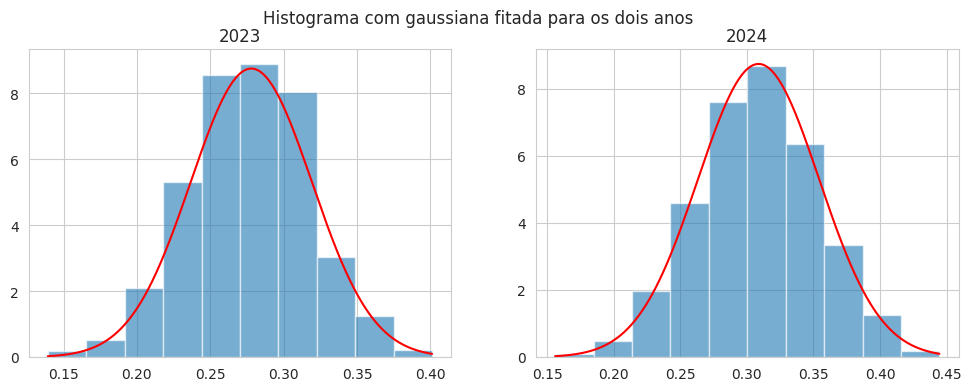

In [70]:
sampling_2023 = [np.random.choice(df_trust2023["score"], 30).mean() for _ in range(1000)]
mu_2023, sigma_2023 = norm.fit(sampling_2023)
x_2023 = np.linspace(min(sampling_2023), max(sampling_2023), 1000)
pdf = norm.pdf(x_2023, mu_2023, sigma_2023)

sampling_2024 = [np.random.choice(df_trust2024["score"], 30).mean() for _ in range(1000)]
mu_2024, sigma_2024 = norm.fit(sampling_2024)
x_2024 = np.linspace(min(sampling_2024), max(sampling_2024), 1000)
pdf = norm.pdf(x_2024, mu_2024, sigma_2024)

fig_trust_hist, axs_trust_hist = plt.subplots(1, 2, figsize=(12, 4))

axs_trust_hist[0].hist(sampling_2023, bins=10, density=True, alpha=0.6)
axs_trust_hist[0].plot(x_2023, pdf, 'r-')
axs_trust_hist[0].set_title("2023")

axs_trust_hist[1].hist(sampling_2024, bins=10, density=True, alpha=0.6)
axs_trust_hist[1].plot(x_2024, pdf, 'r-')
axs_trust_hist[1].set_title("2024")

fig_trust_hist.suptitle("Histograma com gaussiana fitada para os dois anos")
plt.show()

## 3.4. Equivalência das variâncias

Outro dado importante para garantir a veracidade dos testes é a equivalência das variâncias. A função `variance()` calcula a variância para uma variável.

In [84]:
def variance(x):
    n = len(x)
    mean_x = np.mean(x)
    var = np.sum((x - mean_x) ** 2) / (n - 1)
    return var

Aplicando as duas variáveis, podemos ver que elas são equivalentes.

In [85]:
var_2023 = variance(sampling_2023)
var_2024 = variance(sampling_2024)

print(f"Variance 2023: {var_2023}")
print(f"Variance 2024: {var_2024}")

Variance 2023: 0.0016842510400155207
Variance 2024: 0.0020782360669059077


Isso também pode ser observado visualmente no gráfico de boxplot das distribuições.

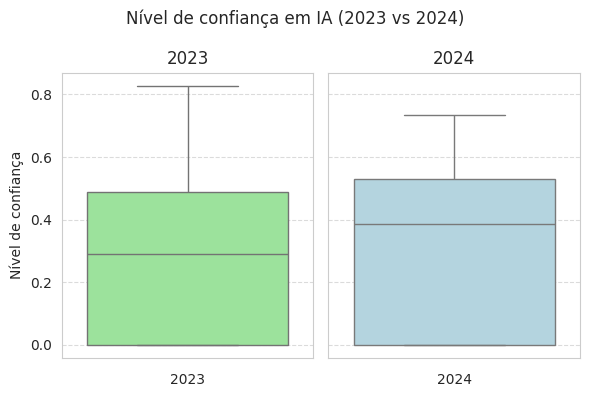

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(6, 4), sharey=True)

sns.boxplot(data=df_trust2023, y='score', ax=axes[0], color="lightgreen")
axes[0].set_title("2023")
axes[0].set_ylabel("Nível de confiança")
axes[0].set_xlabel("2023")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.boxplot(data=df_trust2024, y='score', ax=axes[1], color="lightblue")
axes[1].set_title("2024")
axes[1].set_ylabel("")
axes[1].set_xlabel("2024")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Nível de confiança em IA (2023 vs 2024)")
plt.tight_layout()
plt.show()

## 3.3. T-test

Finalmente podemos aplicar o t-test para duas variáveis independentes, que tenham variâncias idênticas. O objeto retornado por `ttest_ind` inclui atributos para:

- `statistic`: é o valor de t-statistic.
- `pvalue`: é o valor de p-value.
- `df`: é o número de graus de liberdade utilizado.

Podemos observar um valor de p-value da ordem de $10^{-188}$, que é muito menor que 0.005. Dessa forma, **rejeitamos a hipótese nula** de que o nível de confiança dos desenvolvedores em relação à IA não mudou significativamente entre os anos de 2023 e 2024.

Esse resultado indica que há evidências estatisticamente significativas para afirmar que houve uma mudança no nível de confiança dos desenvolvedores. Como o p-value é extremamente pequeno, a probabilidade de que essa diferença tenha ocorrido por acaso é praticamente nula.

In [56]:
ttest_trust = ttest_ind(df_trust2023["score"], df_trust2024["score"])
ttest_trust

TtestResult(statistic=np.float64(-29.29997322888626), pvalue=np.float64(3.411866059953027e-188), df=np.float64(154619.0))

# 4. Significance level

_Faça slides explicando o código abaixo e interpretando os resultados_

https://colab.research.google.com/drive/13V7IT7XbnNVf4VVehObHO6NZUxaqdl_f?usp=sharing

_Teste com dois valores para significance_level_

_Pelo menos quatro slides com a explicação e interpretação._

O código original é o exposto a seguir:

In [137]:
num_simulations = 10000
sample_size = 30
true_mean = 50
true_std = 10
significance_level = 0.95

significant_results = 0

for _ in range(num_simulations):

    group1 = np.random.normal(true_mean, true_std, sample_size)
    group2 = np.random.normal(true_mean, true_std, sample_size)

    t_stat, p_value = ttest_ind(group1, group2)

    if p_value < significance_level:
        significant_results += 1

proportion_significant = significant_results / num_simulations

print(f"Number of simulations: {num_simulations}")
print(f"Significance level (alpha): {significance_level}")
print(f"Proportion of significant results (Type I error rate): {proportion_significant:.4f}")

Number of simulations: 10000
Significance level (alpha): 0.95
Proportion of significant results (Type I error rate): 0.9525


Fiz um gráfico de histogramas para as sampling distribution das simulações, mostrando como elas são extremamente parecidas.

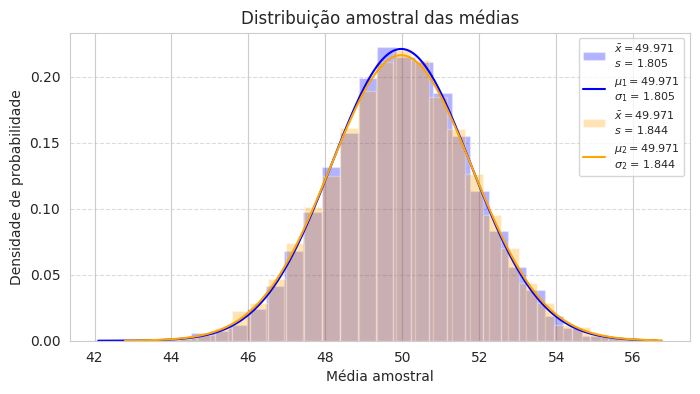

In [113]:
num_simulations = 10000
sample_size = 30
true_mean = 50
true_std = 10

sampling_1 = [np.mean(np.random.normal(true_mean, true_std, sample_size)) for _ in range(num_simulations)]
mu_1, sigma_1 = norm.fit(sampling_1)
x_1 = np.linspace(min(sampling_1), max(sampling_1), 1000)
pdf_1 = norm.pdf(x_1, mu_1, sigma_1)

sampling_2 = [np.mean(np.random.normal(true_mean, true_std, sample_size)) for _ in range(num_simulations)]
mu_2, sigma_2 = norm.fit(sampling_2)
x_2 = np.linspace(min(sampling_2), max(sampling_2), 1000)
pdf_2 = norm.pdf(x_2, mu_2, sigma_2)

fig_sampling, ax_sampling = plt.subplots(figsize=(8, 4))

ax_sampling.hist(sampling_1, bins=30, density=True, color="blue", alpha=0.3, label=r"$\bar{x} = $"+f"{np.mean(sampling_1):.3f}\n"+r"$s$ = "+f"{np.std(sampling_1):.3f}")
ax_sampling.plot(x_1, pdf_1, color="blue", label=r"$\mu_{1} = $"+f"{mu_1:.3f}\n"+r"$\sigma_{1}$ = "+f"{sigma_1:.3f}")

ax_sampling.hist(sampling_2, bins=30, density=True, color="orange", alpha=0.3, label=r"$\bar{x} = $"+f"{np.mean(sampling_2):.3f}\n"+r"$s$ = "+f"{np.std(sampling_2):.3f}")
ax_sampling.plot(x_2, pdf_2, color="orange", label=r"$\mu_{2} = $"+f"{mu_2:.3f}\n"+r"$\sigma_{2}$ = "+f"{sigma_2:.3f}")

ax_sampling.set_title("Distribuição amostral das médias")
ax_sampling.set_xlabel("Média amostral")
ax_sampling.set_ylabel("Densidade de probabilidade")
ax_sampling.grid(axis='y', linestyle='--', alpha=0.7)
ax_sampling.legend(loc="upper right", fontsize=8)
plt.savefig("imagens/sampling_distribution.png", dpi=600)
plt.show()

Além disso, gerei as simulações para diferentes níveis de significância à exaustão, guardando os resultados em um DataFrame.

In [ ]:
num_simulations = 10000
sample_size = 30
true_mean = 50
true_std = 10
significance_levels = np.linspace(0.01, 0.99, 99)

data_results = {
    "significance_level": [],
    "significant_results": [],
    "proportion_significant": []
}

for significance_level in significance_levels:

    significant_results = 0

    for _ in range(num_simulations):

        group1 = np.random.normal(true_mean, true_std, sample_size)
        group2 = np.random.normal(true_mean, true_std, sample_size)

        t_stat, p_value = ttest_ind(group1, group2)

        if p_value < significance_level:
            significant_results += 1

    proportion_significant = significant_results / num_simulations

    data_results["significance_level"].append(significance_level)
    data_results["significant_results"].append(significant_results)
    data_results["proportion_significant"].append(proportion_significant)

df_results = pd.DataFrame(data_results)
df_results

,significance_level,significant_results,proportion_significant
0,0.01,95,0.0095
1,0.02,202,0.0202
2,0.03,299,0.0299
3,0.04,403,0.0403
4,0.05,505,0.0505
...,...,...,...
94,0.95,9503,0.9503
95,0.96,9616,0.9616
96,0.97,9676,0.9676
97,0.98,9813,0.9813


Um gráfico de dispersão que mostra a evolução da quantidade de resultados significantes de acordo com o aumento do nível de significância é gerado a seguir.

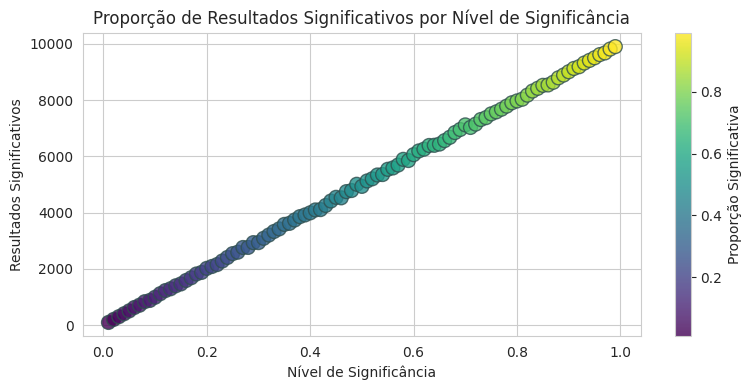

In [136]:
fig_significance, ax_significance = plt.subplots(figsize=(8, 4))

scatter = ax_significance.scatter(
    df_results["significance_level"], 
    df_results["significant_results"], 
    c=df_results["proportion_significant"], 
    cmap="viridis", 
    edgecolor="darkslategrey", 
    alpha=0.8, 
    s=100
)

ax_significance.set_title("Proporção de Resultados Significativos por Nível de Significância")
ax_significance.set_xlabel("Nível de Significância")
ax_significance.set_ylabel("Resultados Significativos")

cbar = plt.colorbar(scatter, ax=ax_significance)
cbar.set_label("Proporção Significativa")

plt.tight_layout()
plt.savefig("imagens/significance_results.png", dpi=600)

plt.show()


Os slides da explicação estão expostos no gif a seguir.

<p align="center">
  <img src="./imagens/slides.gif" alt="Slide Animation" width="800">
</p>


# 5. Reproduzindo slides em código

Reproduza em Python o conteúdo dos [slides de 24 a 46](https://docs.google.com/presentation/d/1gMKonLnK3buDUGGJGt1AAS-Ki3jT93LZ/edit?usp=sharing&ouid=115043904090702383039&rtpof=true&sd=true).

O vídeo original utiliza dados de batimento cardíaco por minuto (BPM) em mulheres para mostrar os conceitos de population mean e population proportion. De modo similar, vou utilizar um dataset de BPM em mulheres, mas obtidos de outra fonte.

In [139]:
!curl -L -o human-vital-sign-dataset.zip https://www.kaggle.com/api/v1/datasets/download/nasirayub2/human-vital-sign-dataset

!unzip -o human-vital-sign-dataset.zip && rm human-vital-sign-dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 14.0M  100 14.0M    0     0  2497k      0  0:00:05  0:00:05 --:--:-- 3151k
Archive:  human-vital-sign-dataset.zip
  inflating: human_vital_signs_dataset_2024.csv  


O dataset possui outras informações de sinais vitais de pessoas em geral, portanto será filtrado para manter apenas as colunas de id, BPM e gênero.

Em seguida, essas colunas são renomeadas para facilitar a referência.

Também são filtradas apenas as amostras de indivíduos do sexo feminino.

Por fim, é adicionada uma nova coluna que indica se a amostra possui batimentos anormais, que aqui foram mapeados para aqueles acima de 90 BPM.

In [155]:
df_heart = pd.read_csv("human_vital_signs_dataset_2024.csv")
df_heart = df_heart[["Patient ID", "Heart Rate", "Gender"]]
df_heart.columns = ["id", "rate", "gender"]
df_heart = df_heart.loc[df_heart["gender"] == "Female"]
df_heart["high"] = df_heart["rate"].map(lambda x: "Yes" if x > 90 else "No")
df_heart

,id,rate,gender,high
0,1,60,Female,No
2,3,63,Female,No
3,4,99,Female,Yes
4,5,69,Female,No
7,8,96,Female,Yes
...,...,...,...,...
200009,200010,76,Female,No
200010,200011,83,Female,No
200017,200018,81,Female,No
200018,200019,83,Female,No


Assim como no vídeo, foi feita uma amostragem de 50 indivíduos.

In [159]:
df_heart_sample = df_heart.sample(50, random_state=42)
df_heart_sample.head()

,id,rate,gender,high
81932,81933,71,Female,No
130336,130337,61,Female,No
36887,36888,62,Female,No
89942,89943,71,Female,No
28939,28940,95,Female,Yes


## 5.1. Population mean

A population mean será gerada pela função `margin_mean()`, que espera os parâmetros `s` e `confidence_level`, a variável de estudo e o nível de confiança, respectivamente. A função utiliza o probabilidade cumulativa para o nível de confiança, conforme requerido pela biblioteca SciPy para calcular o t-critical do intervalo. A seguir podemos observar que para uma média amostral de 80.74, temos 95% de certeza que os batimentos cardíacos de uma mulher estarão dentro do intervalo de 77.27 e 84.20.

In [157]:
def margin_mean(s, confidence_level: float):
    n = len(s)
    degrees_freedom = n - 1
    true_confidence_level = 1 - (1 - confidence_level) / 2
    std = s.std()
    t_critical = t.ppf(true_confidence_level, degrees_freedom)
    margin = t_critical * (std / math.sqrt(n))
    return margin

sample_mean = df_heart_sample["rate"].mean()
confidence_range = margin_mean(df_heart_sample["rate"], 0.95)
confidence_lower = sample_mean - confidence_range
confidence_upper = sample_mean + confidence_range

print(f"Sample Mean: {sample_mean}")
print(f"Confidence Range: {confidence_range}")
print(f"Confidence Interval: ({confidence_lower}, {confidence_upper})")

Sample Mean: 80.74
Confidence Range: 3.469212015567845
Confidence Interval: (77.27078798443215, 84.20921201556784)


## 5.2. Population proportion

Por fim, a population proportion é gerada pela função `margin_population()`. A fórmula para a margem é dada por:

$$p \pm z \sqrt{\frac{p(1-p)}{n}}$$

Onde $p$ é a proporção do evento que se quer observar, neste caso a proporção de mulheres com batimentos cardíacos anormais, que para a amostra é de 1 em 3.

Os resultados indicam uma certeza de 95% da proporção de mulheres com BPMs anormais estar entre 17.2% e 42.7%.

In [162]:
def margin_population(p, n, confidence_level: float):
    true_confidence_level = 1 - (1 - confidence_level) / 2
    z_critical = norm.ppf(true_confidence_level)
    margin = z_critical * math.sqrt(p*(1-p)/n)
    return margin

sample_proportion = df_heart_sample[df_heart_sample["high"] == "Yes"].shape[0] / df_heart_sample.shape[0]
proportion_range = margin_population(sample_proportion, df_heart_sample.shape[0], 0.95)
proportion_lower = sample_proportion - proportion_range
proportion_upper = sample_proportion + proportion_range

print(f"Sample Proportion: {sample_proportion}")
print(f"Proportion Range: {proportion_range}")
print(f"Proportion Interval: ({proportion_lower}, {proportion_upper})")

Sample Proportion: 0.3
Proportion Range: 0.1270201836202236
Proportion Interval: (0.17297981637977639, 0.4270201836202236)
